<a href="https://colab.research.google.com/github/iPrinka/MITx-Micromasters-Statistics-Data-Science/blob/main/one_league_w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classifying Handwritten Digits

**OBJECTIVES**

- Use SVM to classifiy handwritten digits
- Explore different kernels in SVM
- Use `sklearn` to fine tune estimators performance
- Use `Pipeline` and `GridSearchCV` in sklearn to optimize performance

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression, Perceptron, LinearRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
from keras.datasets import mnist

In [ ]:
#load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

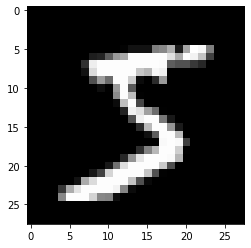

In [ ]:
#visualize the first datapoint
plt.imshow(x_train[0], cmap = 'gray');

In [ ]:
#examine unique values in y
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
x_train.shape

(60000, 28, 28)

#### Preparing the Data

- Flatten the images
- Scale the data


In [ ]:
#examine the shape
x_test.shape

(10000, 28, 28)

In [ ]:
#reshape x_train
x_train = x_train.reshape(60_000, 28*28)

In [ ]:
#reshape x_test
x_test = x_test.reshape(10_000, 28*28)

In [ ]:
x_train.shape

(60000, 784)

**StandardScaler**

$$x_i = \frac{x_i - \mu}{\sigma}$$

In [ ]:
#by hand - find mean and standard deviation
mu = x_train.mean(axis=0)
sigma = x_train.std(axis=0)
sigma[:5]

array([0., 0., 0., 0., 0.])

In [ ]:
#apply them
x_train - mu/sigma

<ipython-input-32-81bab0063488>:2: RuntimeWarning: invalid value encountered in true_divide
  x_train - mu/sigma


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
#using sklearn -- instantiate
sscaler = StandardScaler()

In [ ]:
#fit
sscaler.fit(x_train)

StandardScaler()

In [ ]:
#transform
X_train = sscaler.transform(x_train)

In [ ]:
#all in one with fit_transform
X_train = sscaler.fit_transform(x_train)
X_test = sscaler.transform(x_test)

#### `LinearRegression`

In [ ]:
#instantiate
linreg = LinearRegression()

In [ ]:
#fit
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predict
linpreds = linreg.predict(X_test)

In [ ]:
#score it
accuracy_score(np.round(linpreds, 0), y_test)

0.2203

#### `LinearSVC`

In [ ]:
#instantiate
linsvc = LinearSVC()

In [ ]:
#fit
linsvc.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
#score
linsvc.score(X_test, y_test)

0.9106

#### `LogisticRegression`

How to implement a multinomial model?  Inspect the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and implement `LogisticRegression` as a multi-class model using multinomial regression.  

In [ ]:
#instantiate
logreg = LogisticRegression(multi_class = 'multinomial', solver='saga')

In [ ]:
#fit
logreg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='saga')

In [ ]:
#score on train and test
logreg.score(X_train, y_train)

0.9252666666666667

In [ ]:
logreg.score(X_test, y_test)

0.9223

### Dimensionality Reduction with `PCA`

Important notes:

- Data should be scaled
- Transformer with `fit` and `transform` methods

[docs](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
#instantiate
pca = PCA()

In [ ]:
#fit
pca.fit(X_train)

PCA()

In [ ]:
#transform
X_train_pca = pca.transform(X_train)

In [ ]:
#shape of results?
X_train_pca.shape

(60000, 784)

In [ ]:
#redo with 10 principal components -- instantiate
pca = PCA(n_components=10)

In [ ]:
#transform
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

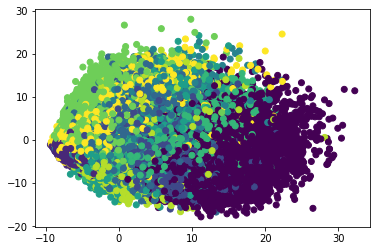

In [ ]:
#visualize first two components with classes
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)

#### SVM with Polynomial kernel

Examine the documentation for the `SVC` classifier [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).  Implement a polynomial kernel with degree 3 on the PCA data from above and score this on the test data.  Compare this to an SVC with a gaussian (`rbf`) kernel.  Which performed. better?

In [ ]:
#instantiate model with polynomial degree 3
svc_poly = SVC(kernel='poly', degree=3)

In [ ]:
#fit on training data
svc_poly.fit(X_train_pca, y_train)

SVC(kernel='poly')

In [ ]:
#score on test data
svc_poly.score(X_test_pca, y_test)

0.9126

In [ ]:
#instantitate other model with rbf kernel
svc_rbf = SVC(kernel='rbf')

In [ ]:
#fit 
svc_rbf.fit(X_train_pca, y_train)

SVC()

In [ ]:
#score
svc_rbf.score(X_test_pca, y_test)

0.9262

#### Streamlining the Modeling Process

- `Pipeline` to combine transformations and preprocessing steps
- `GridSearchCV` to search different parameter combinations

In [ ]:
#Pipeline to scale, pca, svc
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('model', SVC(kernel='rbf'))
    ]
)

In [ ]:
#parameter grid to search 
param_grid = {
    'pca__n_components': [2, 10, 100],
    'model__kernel': ['poly', 'rbf']
}

In [ ]:
#grid search with pipeline
grid = GridSearchCV(pipeline, param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=10)),
                                       ('model', SVC())]),
             param_grid={'model__kernel': ['poly', 'rbf'],
                         'pca__n_components': [2, 10, 100]})

#### Practice: FashionMNIST

Below, a dataset of images of fashion items is loaded and displayed.  Your goal is to build a Support Vector Machine classifier considering different kernels and preprocessing variations.

In [2]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5))
for i in range(5):
  ax[i].imshow(x_train[i], cmap = 'gray')

In [ ]:
x_train.shape